#Visualization

#Preprocessing

In [ ]:
# The length of the data
print(f"The Length of the data: {data.shape}")

The Length of the data: (396030, 27)


In [ ]:
# Missing values
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '22927' ==> '5.789%'
'emp_length': number of missing values '18301' ==> '4.621%'
'title': number of missing values '1755' ==> '0.443%'
'revol_util': number of missing values '276' ==> '0.070%'
'mort_acc': number of missing values '37795' ==> '9.543%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [ ]:
data.emp_title.nunique()

139595

In [ ]:
data.drop('emp_title', axis=1, inplace=True)

In [ ]:
data.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [ ]:
for year in data.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{data[data.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')

10+ years years in this position:
0   0.82
1   0.18
Name: loan_status, dtype: float64
4 years years in this position:
0   0.81
1   0.19
Name: loan_status, dtype: float64
< 1 year years in this position:
0   0.79
1   0.21
Name: loan_status, dtype: float64
6 years years in this position:
0   0.81
1   0.19
Name: loan_status, dtype: float64
9 years years in this position:
0   0.80
1   0.20
Name: loan_status, dtype: float64
2 years years in this position:
0   0.81
1   0.19
Name: loan_status, dtype: float64
3 years years in this position:
0   0.80
1   0.20
Name: loan_status, dtype: float64
8 years years in this position:
0   0.80
1   0.20
Name: loan_status, dtype: float64
7 years years in this position:
0   0.81
1   0.19
Name: loan_status, dtype: float64
5 years years in this position:
0   0.81
1   0.19
Name: loan_status, dtype: float64
1 year years in this position:
0   0.80
1   0.20
Name: loan_status, dtype: float64
nan years in this position:
Series([], Name: loan_status, dtype: float64)


In [ ]:
data.drop('emp_length', axis=1, inplace=True)

In [ ]:
data.title.value_counts().head()


debt consolidation         168108
credit card refinancing     51781
home improvement            17117
other                       12993
consolidation                5583
Name: title, dtype: int64

In [ ]:
data.purpose.value_counts().head()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
Name: purpose, dtype: int64

In [ ]:
data.drop('title', axis=1, inplace=True)

In [ ]:
data.mort_acc.value_counts()

1.00    218458
0.00    139777
Name: mort_acc, dtype: int64

In [ ]:
data.mort_acc.isna().sum()

37795

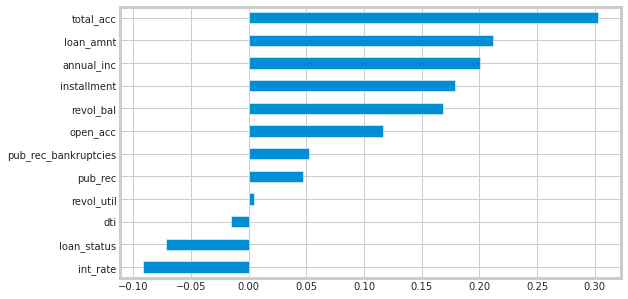

In [ ]:
plt.figure(figsize=(8, 5))
data.corr()['mort_acc'].drop('mort_acc').sort_values().plot(kind='barh')

In [ ]:
total_acc_avg = data.groupby(by='total_acc').mean().mort_acc

In [ ]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [ ]:
data['mort_acc'] = data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [ ]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'revol_util': number of missing values '276' ==> '0.070%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(395219, 24)

#Categorical Variables and Dummy Variables

In [ ]:
print([column for column in data.columns if data[column].dtype == object])

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']


In [ ]:
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
data.sub_grade.unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [ ]:
data.home_ownership.unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [ ]:
data.verification_status.unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [ ]:
data.verification_status.unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [ ]:
data.issue_d.unique()

array(['Jan-2015', 'Nov-2014', 'Apr-2013', 'Sep-2015', 'Sep-2012',
       'Oct-2014', 'Apr-2012', 'Jun-2013', 'May-2014', 'Dec-2015',
       'Apr-2015', 'Oct-2012', 'Jul-2014', 'Feb-2013', 'Oct-2015',
       'Jan-2014', 'Mar-2016', 'Apr-2014', 'Jun-2011', 'Apr-2010',
       'Jun-2014', 'Oct-2013', 'May-2013', 'Feb-2015', 'Oct-2011',
       'Jun-2015', 'Aug-2013', 'Feb-2014', 'Dec-2011', 'Mar-2013',
       'Jun-2016', 'Mar-2014', 'Nov-2013', 'Dec-2014', 'Apr-2016',
       'Sep-2013', 'May-2016', 'Jul-2015', 'Jul-2013', 'Aug-2014',
       'May-2008', 'Mar-2010', 'Dec-2013', 'Mar-2012', 'Mar-2015',
       'Sep-2011', 'Jul-2012', 'Dec-2012', 'Sep-2014', 'Nov-2012',
       'Nov-2015', 'Jan-2011', 'May-2012', 'Feb-2016', 'Jun-2012',
       'Aug-2012', 'Jan-2016', 'May-2015', 'Oct-2016', 'Aug-2015',
       'Jul-2016', 'May-2009', 'Aug-2016', 'Jan-2012', 'Jan-2013',
       'Nov-2010', 'Jul-2011', 'Mar-2011', 'Feb-2012', 'May-2011',
       'Aug-2010', 'Nov-2016', 'Jul-2010', 'Sep-2010', 'Dec-20

In [ ]:
data.purpose.unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [ ]:
data.earliest_cr_line.unique()

array(['Jun-1990', 'Jul-2004', 'Aug-2007', 'Sep-2006', 'Mar-1999',
       'Jan-2005', 'Aug-2005', 'Sep-1994', 'Jun-1994', 'Dec-1997',
       'Dec-1990', 'May-1984', 'Apr-1995', 'Jan-1997', 'May-2001',
       'Mar-1982', 'Sep-1996', 'Jan-1990', 'Mar-2000', 'Jan-2006',
       'Oct-2006', 'Jan-2003', 'May-2008', 'Oct-2003', 'Jun-2004',
       'Jan-1999', 'Apr-1994', 'Apr-1998', 'Jul-2007', 'Apr-2002',
       'Oct-2007', 'Jun-2009', 'May-1997', 'Jul-2006', 'Sep-2003',
       'Aug-1992', 'Dec-1988', 'Feb-2002', 'Jan-1992', 'Aug-2001',
       'Dec-2010', 'Oct-1999', 'Sep-2004', 'Aug-1994', 'Jul-2003',
       'Apr-2000', 'Dec-2004', 'Jun-1995', 'Dec-2003', 'Jul-1994',
       'Oct-1990', 'Dec-2001', 'Apr-1999', 'Feb-1995', 'May-2003',
       'Oct-2002', 'Mar-2004', 'Aug-2003', 'Oct-2000', 'Nov-2004',
       'Mar-2010', 'Mar-1996', 'May-1994', 'Jun-1996', 'Nov-1986',
       'Jan-2001', 'Jan-2002', 'Mar-2001', 'Sep-2012', 'Apr-2006',
       'May-1998', 'Dec-2002', 'Nov-2003', 'Oct-2005', 'May-19

In [ ]:
data.address.unique()

array(['0174 Michelle Gateway\r\nMendozaberg, OK 22690',
       '1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113',
       '87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113', ...,
       '953 Matthew Points Suite 414\r\nReedfort, NY 70466',
       '7843 Blake Freeway Apt. 229\r\nNew Michael, FL 29597',
       '787 Michelle Causeway\r\nBriannaton, AR 48052'], dtype=object)

In [ ]:
data.initial_list_status.unique()

array(['w', 'f'], dtype=object)

In [ ]:
data.application_type.unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [ ]:
term_values = {' 36 months': 36, ' 60 months': 60}
data['term'] = data.term.map(term_values)
data.term.unique()

array([36, 60])

In [ ]:
data.drop('grade', axis=1, inplace=True)
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status',
           'application_type', 'home_ownership']
data = pd.get_dummies(data, columns=dummies, drop_first=True)
data.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,address,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,...,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.00,36,11.44,329.48,117000.00,Jan-2015,0,26.24,Jun-1990,16.00,0,36369.00,41.80,25.00,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1
1,8000.00,36,11.99,265.68,65000.00,Jan-2015,0,22.05,Jul-2004,17.00,0,20131.00,53.30,27.00,1.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,15600.00,36,10.49,506.97,43057.00,Jan-2015,0,12.79,Aug-2007,13.00,0,11987.00,92.20,26.00,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,7200.00,36,6.49,220.65,54000.00,Nov-2014,0,2.60,Sep-2006,6.00,0,5472.00,21.50,13.00,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,24375.00,60,17.27,609.33,55000.00,Apr-2013,1,33.95,Mar-1999,13.00,0,24584.00,69.80,43.00,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650",0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
data.address.head()

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [ ]:
data['zip_code'] = data.address.apply(lambda x: x[-5:])
data.zip_code.value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [ ]:
data = pd.get_dummies(data, columns=['zip_code'], drop_first=True)
data.drop('address', axis=1, inplace=True)
data.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.00,36,11.44,329.48,117000.00,Jan-2015,0,26.24,Jun-1990,16.00,0,36369.00,41.80,25.00,0.00,0.00,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0
1,8000.00,36,11.99,265.68,65000.00,Jan-2015,0,22.05,Jul-2004,17.00,0,20131.00,53.30,27.00,1.00,0.00,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,15600.00,36,10.49,506.97,43057.00,Jan-2015,0,12.79,Aug-2007,13.00,0,11987.00,92.20,26.00,0.00,0.00,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
3,7200.00,36,6.49,220.65,54000.00,Nov-2014,0,2.60,Sep-2006,6.00,0,5472.00,21.50,13.00,0.00,0.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,24375.00,60,17.27,609.33,55000.00,Apr-2013,1,33.95,Mar-1999,13.00,0,24584.00,69.80,43.00,1.00,0.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
data.drop('issue_d', axis=1, inplace=True)

In [ ]:
data['earliest_cr_line'] = data.earliest_cr_line.str.split('-', expand=True)[1]
data.earliest_cr_line.nunique()

65

In [ ]:
print(f"Data shape: {data.shape}")

# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(f"Data shape: {data.shape}")


Data shape: (395219, 79)
Data shape: (395219, 79)


In [ ]:
w_p = data.loan_status.value_counts()[0] / data.shape[0]
w_n = data.loan_status.value_counts()[1] / data.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")

Weight of positive values 0.8038479931379817
Weight of negative values 0.19615200686201828


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler


X = data.drop('loan_status', axis=1)
y = data.loan_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(276653, 78)
(118566, 78)
(276653,)
(118566,)


In [ ]:
X_test.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
22016,20000.00,36,13.53,679.00,80000.00,12.74,1997,6.00,1,13283.00,95.60,23.00,1.00,0.00,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3030,1000.00,60,15.99,24.32,33000.00,20.98,1996,10.00,0,12561.00,89.00,20.00,1.00,0.00,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
213290,5000.00,36,12.35,166.91,47250.00,21.77,2002,8.00,0,3051.00,8.50,17.00,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0
17249,17200.00,36,10.49,558.97,93000.00,20.07,1994,25.00,0,25208.00,45.90,39.00,1.00,0.00,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
113280,7000.00,36,13.53,237.65,39000.00,24.89,1993,9.00,0,10436.00,76.20,33.00,0.00,0.00,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
y

0         0
1         0
2         0
3         0
4         1
         ..
396025    0
396026    0
396027    0
396028    0
396029    0
Name: loan_status, Length: 395219, dtype: object

In [ ]:
X.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.00,36,11.44,329.48,117000.00,26.24,1990,16.00,0,36369.00,41.80,25.00,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0
1,8000.00,36,11.99,265.68,65000.00,22.05,2004,17.00,0,20131.00,53.30,27.00,1.00,0.00,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,15600.00,36,10.49,506.97,43057.00,12.79,2007,13.00,0,11987.00,92.20,26.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
3,7200.00,36,6.49,220.65,54000.00,2.60,2006,6.00,0,5472.00,21.50,13.00,0.00,0.00,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,24375.00,60,17.27,609.33,55000.00,33.95,1999,13.00,0,24584.00,69.80,43.00,1.00,0.00,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import pickle
pickle.dump(scaler, open('./scaler.pkl', 'wb'))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc

def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [ ]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

In [ ]:
X.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.00,36,11.44,329.48,117000.00,26.24,1990,16.00,0,36369.00,41.80,25.00,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0
1,8000.00,36,11.99,265.68,65000.00,22.05,2004,17.00,0,20131.00,53.30,27.00,1.00,0.00,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,15600.00,36,10.49,506.97,43057.00,12.79,2007,13.00,0,11987.00,92.20,26.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
3,7200.00,36,6.49,220.65,54000.00,2.60,2006,6.00,0,5472.00,21.50,13.00,0.00,0.00,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,24375.00,60,17.27,609.33,55000.00,33.95,1999,13.00,0,24584.00,69.80,43.00,1.00,0.00,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
pd.set_option("display.max_columns", None)
X.shape

(395219, 78)

In [ ]:
X_train.shape

(276653, 78)

In [ ]:
X.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'sub_grade_A2',
       'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1',
       'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5',
       'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4',
       'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3',
       'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2',
       'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1',
       'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5',
       'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4',
       'sub_grade_G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_im

In [ ]:
X.shape

(395219, 78)

In [ ]:
X_test

array([[0.49077022, 0.        , 0.3198286 , ..., 0.        , 0.        ,
        0.        ],
       [0.00700191, 1.        , 0.4156603 , ..., 0.        , 0.        ,
        0.        ],
       [0.10884786, 0.        , 0.27386054, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.22342457, 0.        , 0.26490065, ..., 0.        , 0.        ,
        0.        ],
       [0.36028007, 1.        , 0.29879236, ..., 0.        , 0.        ,
        0.        ],
       [0.521324  , 0.        , 0.49357226, ..., 1.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend();

def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    print(num_columns)
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)

    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model


In [ ]:
num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [150, 150, 150]
dropout_rates = [0.1, 0, 0.1, 0]
learning_rate = 1e-3


model = nn_model(
    num_columns=num_columns,
    num_labels=num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=1,
    batch_size=32
)

# model.save(DATA_DIR + "/model")


78
8646/8646 [==============================] - 52s 6ms/step - loss: 0.3313 - AUC: 0.8385 - val_loss: 0.2667 - val_AUC: 0.8984


In [ ]:
X_train.shape[1]

78

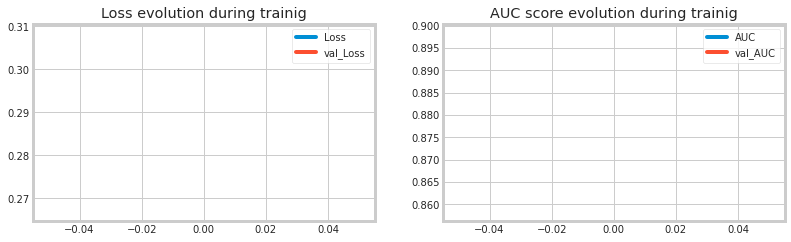

In [ ]:
plot_learning_evolution(r)


In [ ]:
y_train_pred = model.predict(X_train)
evaluate_nn(y_train, y_train_pred.round(), train=True)

Train Result:
Accuracy Score: 88.79%
_______________________________________________
CLASSIFICATION REPORT:
                0.0      1.0  accuracy  macro avg  weighted avg
precision      0.88     0.95      0.89       0.92          0.89
recall         0.99     0.45      0.89       0.72          0.89
f1-score       0.93     0.61      0.89       0.77          0.87
support   222387.00 54266.00      0.89  276653.00     276653.00
_______________________________________________
Confusion Matrix: 
 [[221051   1336]
 [ 29685  24581]]



In [ ]:
y_test_pred = model.predict(X_test)
evaluate_nn(y_test, y_test_pred.round(), train=False)

Test Result:
Accuracy Score: 88.82%
_______________________________________________
CLASSIFICATION REPORT:
               0.0      1.0  accuracy  macro avg  weighted avg
precision     0.88     0.95      0.89       0.92          0.90
recall        0.99     0.45      0.89       0.72          0.89
f1-score      0.93     0.61      0.89       0.77          0.87
support   95309.00 23257.00      0.89  118566.00     118566.00
_______________________________________________
Confusion Matrix: 
 [[94786   523]
 [12731 10526]]



In [ ]:
scores_dict = {
    'ANNs': {
        'Train': roc_auc_score(y_train, model.predict(X_train)),
        'Test': roc_auc_score(y_test, model.predict(X_test)),
    },
}

#XG Boost Classifier

In [ ]:
from xgboost import XGBClassifier

n_estimators = [50, 100, 200]
learning_rate = [0.05, 0.01, 0.5, 0.1, 1]
tree_method = ['gpu_hist']

params_grid = {
    'n_estimators': n_estimators,
#     'learning_rate': learning_rate,
}

xgb_clf = XGBClassifier()
xgb_cv = GridSearchCV(xgb_clf, params_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
# xgb_cv.fit(X_train, y_train)
# best_params = xgb_cv.best_params_
# best_params['tree_method'] = 'gpu_hist'
best_params = {'n_estimators': 50, 'tree_method': 'gpu_hist'}
print(f"Best Parameters: {best_params}")

xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)


Best Parameters: {'n_estimators': 50, 'tree_method': 'gpu_hist'}
Train Result:
Accuracy Score: 88.81%
_______________________________________________
CLASSIFICATION REPORT:
                0.0      1.0  accuracy  macro avg  weighted avg
precision      0.88     1.00      0.89       0.94          0.90
recall         1.00     0.43      0.89       0.71          0.89
f1-score       0.93     0.60      0.89       0.77          0.87
support   222387.00 54266.00      0.89  276653.00     276653.00
_______________________________________________
Confusion Matrix: 
 [[222387      0]
 [ 30948  23318]]

Test Result:
Accuracy Score: 88.80%
_______________________________________________
CLASSIFICATION REPORT:
               0.0      1.0  accuracy  macro avg  weighted avg
precision     0.88     1.00      0.89       0.94          0.90
recall        1.00     0.43      0.89       0.71          0.89
f1-score      0.93     0.60      0.89       0.77          0.87
support   95309.00 23257.00      0.89  11856

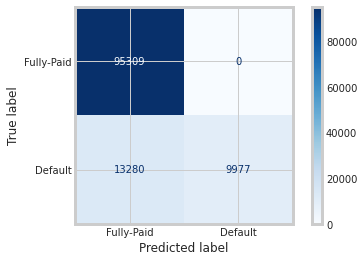

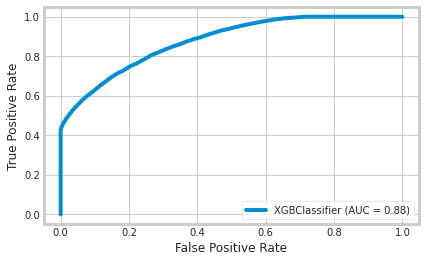

In [ ]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

disp = plot_confusion_matrix(xgb_clf, X_test, y_test,
                             cmap='Blues', values_format='d',
                             display_labels=['Fully-Paid', 'Default'])

disp = plot_roc_curve(xgb_clf, X_test, y_test)


In [ ]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0.0      1.0  accuracy  macro avg  weighted avg
precision      1.00     1.00      1.00       1.00          1.00
recall         1.00     1.00      1.00       1.00          1.00
f1-score       1.00     1.00      1.00       1.00          1.00
support   222387.00 54266.00      1.00  276653.00     276653.00
_______________________________________________
Confusion Matrix: 
 [[222387      0]
 [     3  54263]]

Test Result:
Accuracy Score: 88.89%
_______________________________________________
CLASSIFICATION REPORT:
               0.0      1.0  accuracy  macro avg  weighted avg
precision     0.88     0.97      0.89       0.92          0.90
recall        1.00     0.45      0.89       0.72          0.89
f1-score      0.94     0.61      0.89       0.77          0.87
support   95309.00 23257.00      0.89  118566.00     118566.00
_____________________________________________

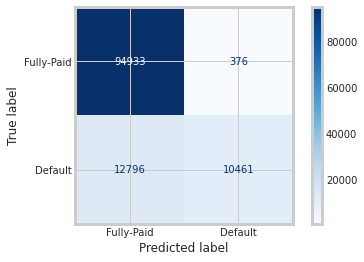

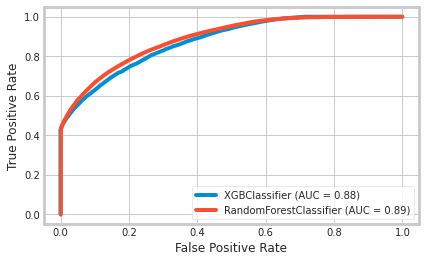

In [ ]:
disp = plot_confusion_matrix(rf_clf, X_test, y_test,
                             cmap='Blues', values_format='d',
                             display_labels=['Fully-Paid', 'Default'])

disp = plot_roc_curve(xgb_clf, X_test, y_test)
plot_roc_curve(rf_clf, X_test, y_test, ax=disp.ax_)


In [ ]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

# Comparing Models Prerformance


In [ ]:
ml_models = {
    'Random Forest': rf_clf,
    'XGBoost': xgb_clf,
    'ANNs': model
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.723
XGBOOST                        roc_auc_score: 0.714
ANNS                           roc_auc_score: 0.898


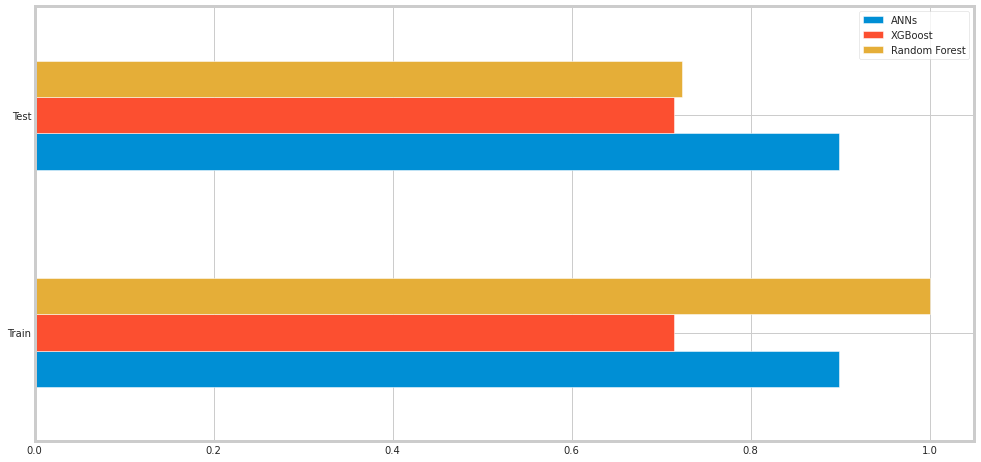

In [ ]:
scores_df = pd.DataFrame(scores_dict)
scores_df.plot(kind='barh', figsize=(15, 8))

In [ ]:
from tensorflow import keras
DATA_DIR = '/content/drive/MyDrive/Loan Capability'
model = keras.models.load_model(DATA_DIR + "/model")

In [ ]:
loan_amnt = 20000
term = "36 months"
int_rate = 13.53
installment = 679
annual_inc = 80000
dti = 12.74
earliest_cr_line = "01-08-1997"
open_acc = 6
pub_rec = 1
revol_bal = 13283
revol_util = 95.6
total_acc = 23
mort_acc = 1
pub_rec_bankruptcies = 0
sub_grade = "B5"
verification_status = "Source Verified"
purpose = "credit_card"
initial_list_status = "f"
application_type = "INDIVIDUAL"
home_ownership = "MORTGAGE"
zip_code = "043 Manning Ville Suite 056 Lauraport, WA 22690"

term = float(term[0:2])
earliest_cr_line = float(earliest_cr_line[-4:])
zip_code = zip_code[-5:]

subgradeList = {'A2': 0, 'A3': 0, 'A4': 0, 'A5': 0, 'B1': 0, 'B2': 0, 'B3': 0, 'B4': 0, 'B5': 0,
              'C1': 0, 'C2': 0, 'C3': 0, 'C4': 0, 'C5': 0, 'D1': 0, 'D2': 0, 'D3': 0, 'D4': 0, 'D5': 0,
              'E1': 0, 'E2': 0, 'E3': 0, 'E4': 0, 'E5': 0, 'F1': 0, 'F2': 0, 'F3': 0, 'F4': 0, 'F5': 0,
              'G1': 0, 'G2': 0, 'G3': 0, 'G4': 0, 'G5': 0, 'G3': 0 }

if (sub_grade != "A1"):
  subgradeList[sub_grade] = 1

verification_statusList = {'Source Verified': 0, 'Verified': 0}

if (verification_status != "Not Verified"):
  verification_statusList[verification_status] = 1

purposeList = {'credit_card': 0, 'debt_consolidation': 0, 'educational': 0, 'home_improvement': 0, 'house': 0,
              'major_purchase': 0, 'medical': 0, 'moving': 0, 'other': 0, 'renewable_energy': 0, 'small_business': 0,
              'vacation': 0, 'wedding': 0}
if (purpose != "car"):
  purposeList[purpose] = 1

if (initial_list_status == "w"):
  initial_list_status_w = 1
else:
  initial_list_status_w = 0

application_typeList = {'INDIVIDUAL': 0, 'JOINT': 0}
if (application_type != "DIRECT_PAY"):
  application_typeList[application_type] = 1

home_ownershipList = {'OTHER': 0, 'OWN': 0, 'RENT': 0}
if (home_ownership != "MORTGAGE"):
  application_typeList[home_ownership] = 1

zip_codeList = {'05113': 0, '11650': 0, '22690': 0, '29597': 0, '30723': 0, '48052': 0, '70466': 0, '86630': 0, '93700': 0}
if (zip_code != "00813"):
  zip_codeList[zip_code] = 1


In [ ]:
data = [loan_amnt, term, int_rate, installment, annual_inc, dti, earliest_cr_line, open_acc, pub_rec, revol_bal, revol_util,
        total_acc, mort_acc, pub_rec_bankruptcies]

for w in subgradeList.values():
  data.append(w)


for w in verification_statusList.values():
  data.append(w)


for w in purposeList.values():
  data.append(w)

data.append(initial_list_status_w)


for w in application_typeList.values():
  data.append(w)


for w in home_ownershipList.values():
  data.append(w)


for w in zip_codeList.values():
  data.append(w)


len(data)


78

In [ ]:
import pickle
loadedScaler = pickle.load(open("./scaler.pkl", 'rb'))
data = loadedScaler.transform([data])

[20000,
 36.0,
 13.53,
 679,
 80000,
 12.74,
 1997.0,
 6,
 1,
 13283,
 95.6,
 23,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
X_test[0]

array([0.49077022, 0.        , 0.3198286 , 0.43537393, 0.00918845,
       0.00127413, 0.74603176, 0.05617978, 1.        , 0.00761961,
       0.10713886, 0.1418919 , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.     

In [ ]:
model.predict([data])

array([[0.]], dtype=float32)

In [ ]:
model.predict(X_test)